Clone the required dataset from given

In [ ]:
#Cloning the required dataset
!git clone https://github.com/procodingclass/Pro-M3-Hurricane-Damage-Dataset

Cloning into 'Pro-M3-Hurricane-Damage-Dataset'...
remote: Enumerating objects: 800, done.
remote: Total 800 (delta 0), reused 0 (delta 0), pack-reused 800
Receiving objects: 100% (800/800), 2.07 MiB | 25.54 MiB/s, done.


Display first image from training dataset

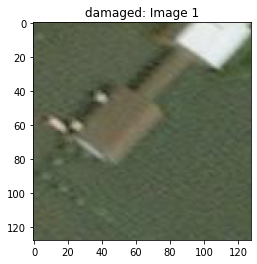

In [ ]:
#Display image
from matplotlib import pyplot
from matplotlib.image import imread

training_damaged_image = "/content/Pro-M3-Hurricane-Damage-Dataset/train/damage/image (1).jpeg"

# load image pixels
image = imread(training_damaged_image)

pyplot.title("damaged: Image 1")

# plot raw pixel data
pyplot.imshow(image)

# show the figure
pyplot.show()

Perform augmentation on Training dataset

Found 300 images belonging to 2 classes.


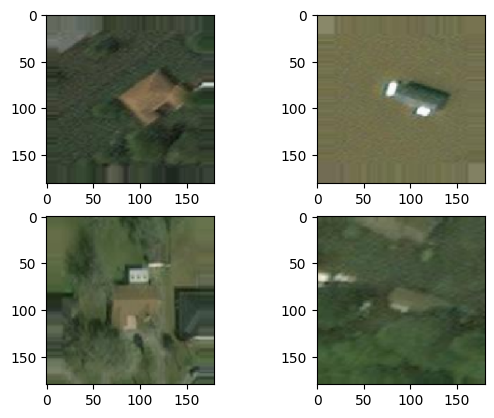

In [ ]:
#zoom and horizontal flip (Or any augmentation technique of your choice)
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from matplotlib.image import imread

training_data_generator = ImageDataGenerator(zoom_range=0.3,horizontal_flip=True,fill_mode="nearest")
training_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/train"
trainingAgumentImg = training_data_generator.flow_from_directory(training_image_directory, target_size=(180,180))

for i in range(4):
  pyplot.subplot(2,2,i+1)
  batch = trainingAgumentImg.next()
  image = batch[0][0].astype("uint8")
  pyplot.imshow(image)

pyplot.show()

In [ ]:
#Visualize the preprocessed image
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu", input_shape = (180,180,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation="relu"),
    tf.keras.layers.Dense(2,activation="softmax"),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 128)       0

Visualize the augmented images in four sub-plots

In [ ]:
validation_data_generator = ImageDataGenerator(rescale = 1.0/255)

# Image Directory
validation_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/validate"

# Generate Preprocessed Augmented Data
validation_augmented_images = validation_data_generator.flow_from_directory(
    validation_image_directory,
    target_size=(180,180))

Found 300 images belonging to 2 classes.


In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = "adam", metrics = ["accuracy"])

In [ ]:
## ADD CODE HERE
db = model.fit(trainingAgumentImg, epochs = 20, validation_data = validation_augmented_images, verbose= True)

Epoch 1/20
10/10 [==============================] - 45s 4s/step - loss: 6.1309 - accuracy: 0.5167 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/20
10/10 [==============================] - 44s 4s/step - loss: 0.6557 - accuracy: 0.5933 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 3/20
10/10 [==============================] - 42s 4s/step - loss: 0.6617 - accuracy: 0.6033 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 42s 4s/step - loss: 0.6252 - accuracy: 0.6567 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 40s 4s/step - loss: 0.5209 - accuracy: 0.7533 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/20
10/10 [==============================] - 40s 4s/step - loss: 0.6350 - accuracy: 0.5900 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/20
10/10 [==============================] - 40s 4s/step - loss: 0.6819 - accuracy: 0.6100 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 8/20
10/10 [==

In [ ]:
trainingAgumentImg.class_indices

{'damage': 0, 'no_damage': 1}

1/1 [==============================] - 0s 46ms/step


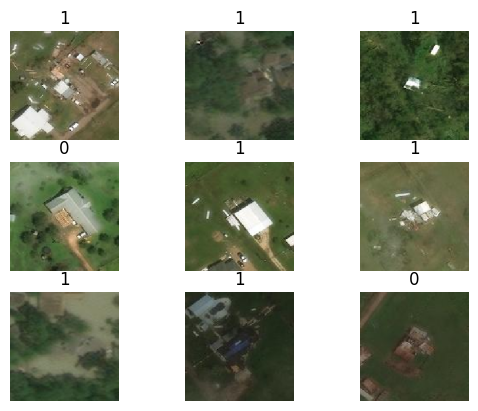

In [ ]:
import os
import numpy as np

from matplotlib import pyplot
from matplotlib.image import imread

import tensorflow
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

# Testing image directory
testing_image_directory = "/content/Pro-M3-Hurricane-Damage-Dataset/test/damage"

# All image files in the directory
img_files = os.listdir(testing_image_directory)
i = 0

## ADD CODE HERE

for file in img_files[4:13]:
  img_files_path = os.path.join(testing_image_directory,file)
  img_1 = load_img(img_files_path,target_size = (180,180))
  img_2 = img_to_array(img_1)
  img_3 = np.expand_dims(img_2,axis=0)
  prediction = model.predict(img_3)
 # print(prediction)
  predict_class = np.argmax(prediction,axis=1)
 # print(predict_class)
  pyplot.subplot(3,3,i+1)
  pyplot.imshow(img_2.astype('uint8'))
  pyplot.title(predict_class[0])
  pyplot.axis('off')
  i += 1

pyplot.show()